In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('/Users/arijitchandra/Downloads/AV_cross_sell/train.csv')
test = pd.read_csv('/Users/arijitchandra/Downloads/AV_cross_sell/test.csv')
sub = pd.read_csv('/Users/arijitchandra/Downloads/AV_cross_sell/sample_sub.csv')

In [2]:
train.shape, test.shape, sub.shape

((381109, 12), (127037, 11), (127037, 2))

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
print("Total Features with NaN Values in train = " + str(train.columns[train.isnull().sum() != 0].size)) 
print("Total Features with NaN Values in test = " + str(test.columns[test.isnull().sum() != 0].size))

Total Features with NaN Values in train = 0
Total Features with NaN Values in test = 0


In [5]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [6]:
train.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [7]:
test.nunique()

id                      127037
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           36327
Policy_Sales_Channel       145
Vintage                    290
dtype: int64

### Merging Train and Test Data for analysis

In [8]:
train['merge_flag'] = 0
test['Response'] = 9
test['merge_flag'] = 1
df = train.append(test, ignore_index=True)
df.shape

(508146, 13)

In [9]:
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
color = sns.color_palette()

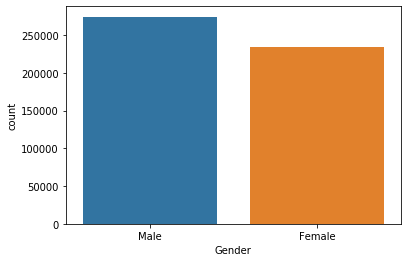

In [10]:
sns.countplot(df.Gender)
plt.show()

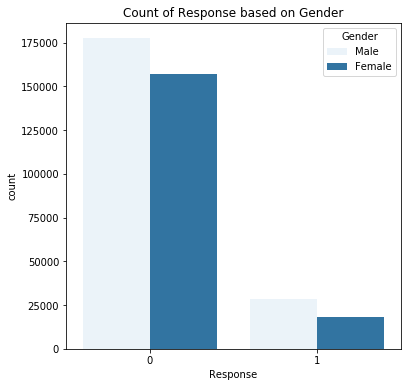

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(train.Response, hue='Gender', data=train, color=color[0])
plt.title("Count of Response based on Gender", fontsize=12)
plt.show()

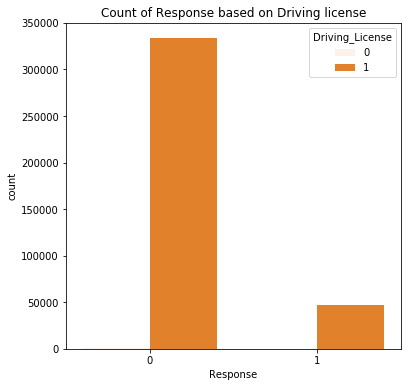

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(train.Response, hue='Driving_License', data=train, color=color[1])
plt.title("Count of Response based on Driving license", fontsize=12)
plt.show()

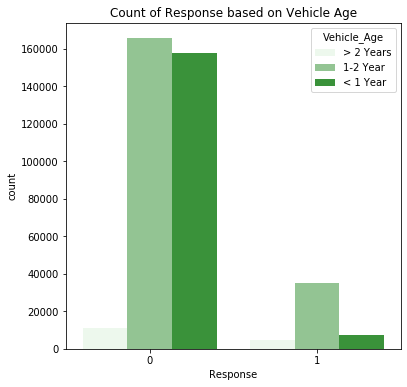

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(train.Response, hue='Vehicle_Age', data=train, color=color[2])
plt.title("Count of Response based on Vehicle Age", fontsize=12)
plt.show()

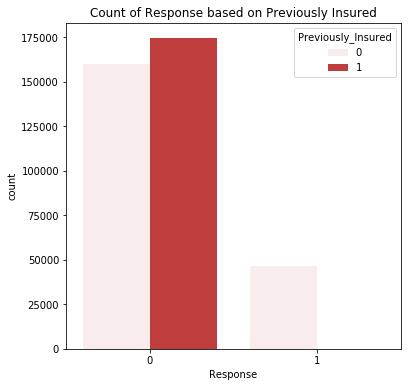

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(train.Response, hue='Previously_Insured', data=train, color=color[3])
plt.title("Count of Response based on Previously Insured", fontsize=12)
plt.show()

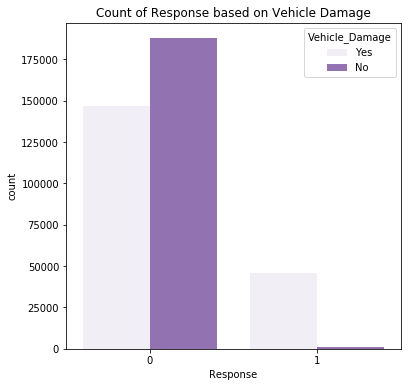

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(train.Response, hue='Vehicle_Damage', data=train, color=color[4])
plt.title("Count of Response based on Vehicle Damage", fontsize=12)
plt.show()

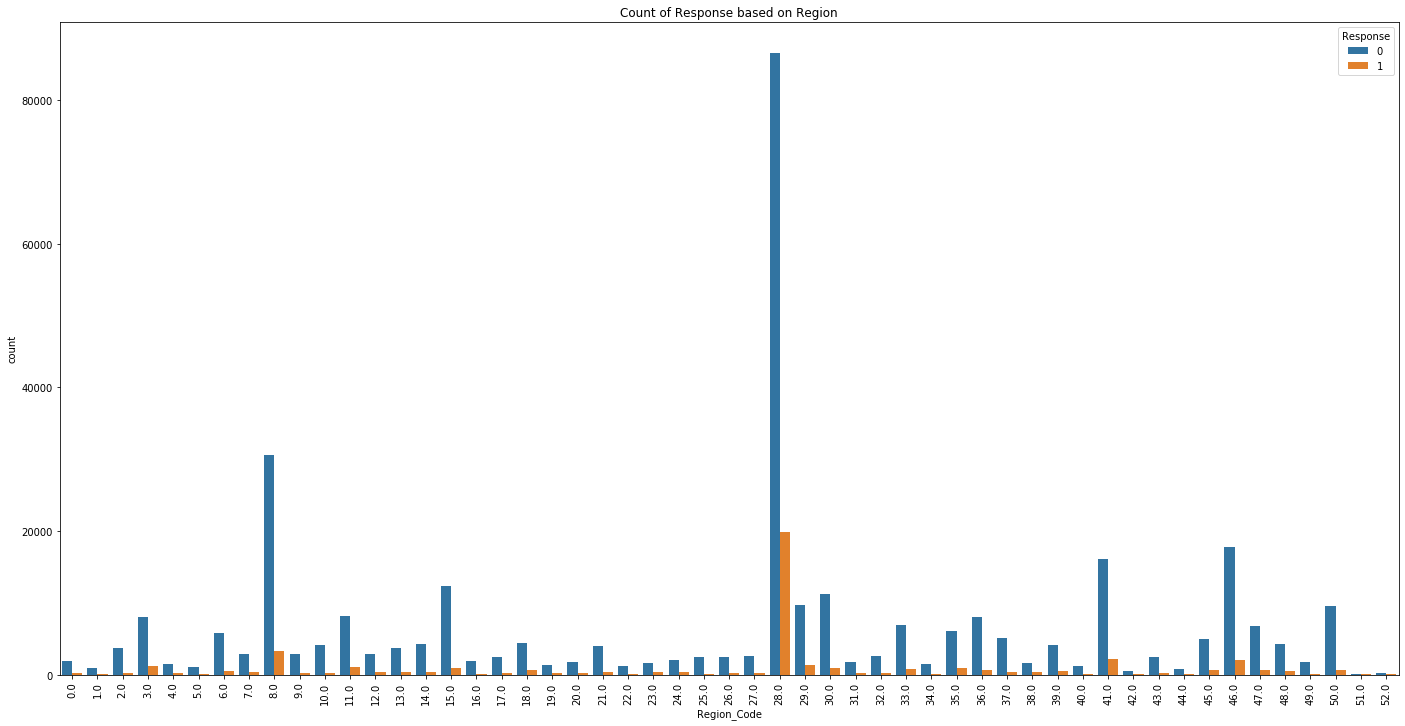

In [16]:
plt.figure(figsize=(24,12))
sns.countplot(train.Region_Code, hue='Response', data=train)
plt.xticks(rotation=90)
plt.title("Count of Response based on Region", fontsize=12)
plt.show()

### Feature extraction by grouping categorical features-

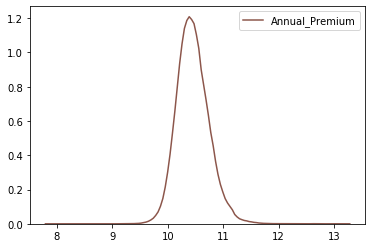

In [17]:
## Distribution of annual premium amount after log transformation

sns.kdeplot(np.log(df.Annual_Premium), color=color[5])
plt.show()

df['Annual_Premium'] = np.log(df.Annual_Premium)

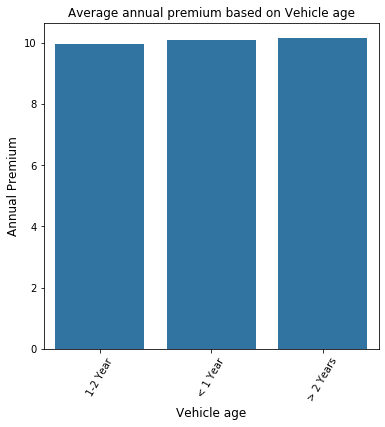

In [18]:
plt.figure(figsize=(6,6))
sns.barplot(y="Annual_Premium",x=df.groupby(['Vehicle_Age']).mean().index,
            data=df.groupby(['Vehicle_Age']).mean(), color=color[0])
plt.ylabel('Annual Premium', fontsize=12)
plt.xlabel('Vehicle age', fontsize=12)
plt.xticks(rotation=60)
plt.title("Average annual premium based on Vehicle age", fontsize=12)
plt.show()

In [ ]:
#df['MeanAP_VhAge'] = df.groupby(['Vehicle_Age'])['Annual_Premium'].transform('mean')
#df['MeanAP_VhAge_diff'] = df.Annual_Premium - df.MeanAP_VhAge

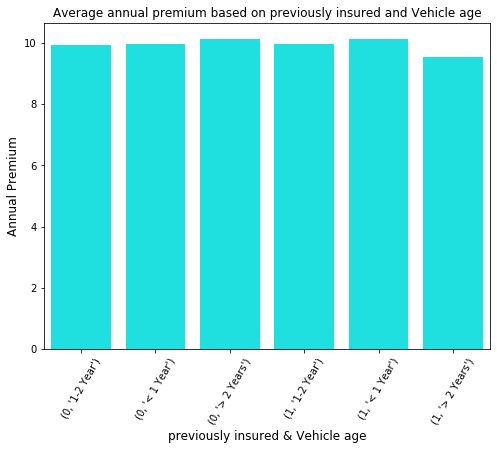

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(y="Annual_Premium",x=df.groupby(['Previously_Insured','Vehicle_Age']).mean().index,
            data=df.groupby(['Previously_Insured','Vehicle_Age']).mean(), color='cyan')
plt.ylabel('Annual Premium', fontsize=12)
plt.xlabel('previously insured & Vehicle age', fontsize=12)
plt.xticks(rotation=60)
plt.title("Average annual premium based on previously insured and Vehicle age", fontsize=12)
plt.show()

In [ ]:
#df['MeanAP_VhAge_PI'] = df.groupby(['Previously_Insured','Vehicle_Age'])['Annual_Premium'].transform('mean')
#df['MeanAP_VhAge_PI_diff'] = df.Annual_Premium - df.MeanAP_VhAge_PI

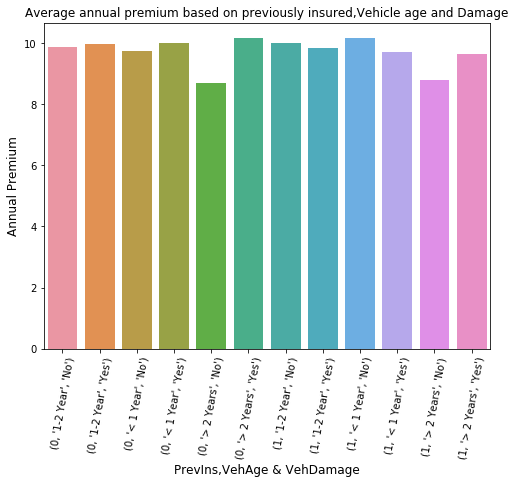

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(y="Annual_Premium",x=df.groupby(['Previously_Insured','Vehicle_Age','Vehicle_Damage']).mean().index,
            data=df.groupby(['Previously_Insured','Vehicle_Age','Vehicle_Damage']).mean())
plt.ylabel('Annual Premium', fontsize=12)
plt.xlabel('PrevIns,VehAge & VehDamage', fontsize=12)
plt.xticks(rotation=80)
plt.title("Average annual premium based on previously insured,Vehicle age and Damage", fontsize=12)
plt.show()

In [ ]:
#df['MeanAP_VA_PI_VD'] = df.groupby(['Previously_Insured','Vehicle_Age','Vehicle_Damage'])['Annual_Premium'].transform('mean')
#df['MeanAP_VA_PI_VD_diff'] = df.Annual_Premium - df.MeanAP_VA_PI_VD

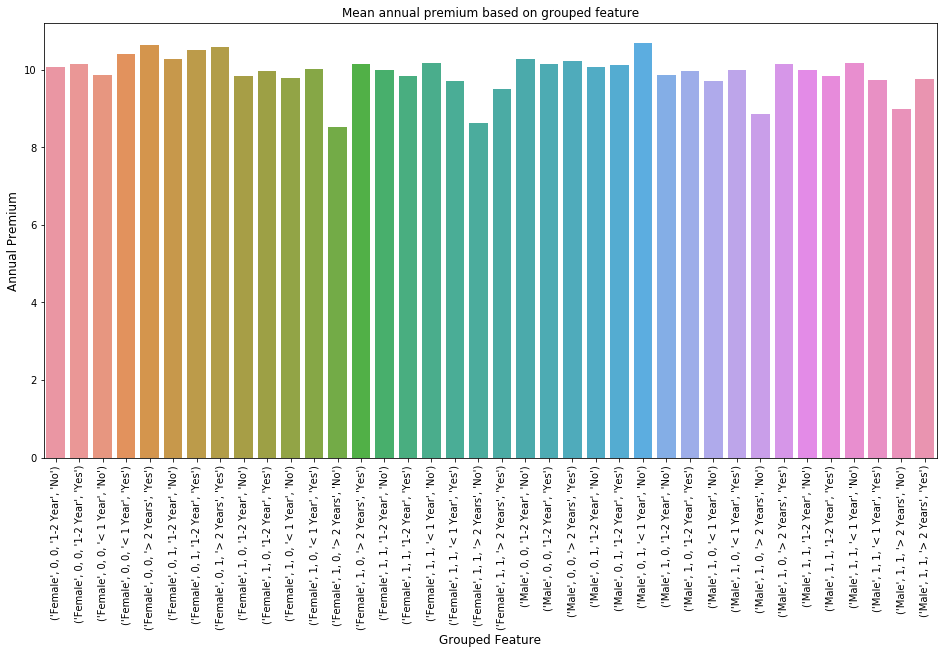

In [21]:
grp_feature = ['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage']
plt.figure(figsize=(16,8))
sns.barplot(y="Annual_Premium",x=df.groupby(grp_feature).mean().index,
            data=df.groupby(grp_feature).mean())
plt.ylabel('Annual Premium', fontsize=12)
plt.xlabel('Grouped Feature', fontsize=12)
plt.xticks(rotation=90)
plt.title("Mean annual premium based on grouped feature", fontsize=12)
plt.show()

In [22]:
df['MeanAP_grp'] = df.groupby(grp_feature)['Annual_Premium'].transform('mean')
#df['MeanAP_grp_norm'] = (df.MeanAP_grp - df.Annual_Premium)/df.Annual_Premium

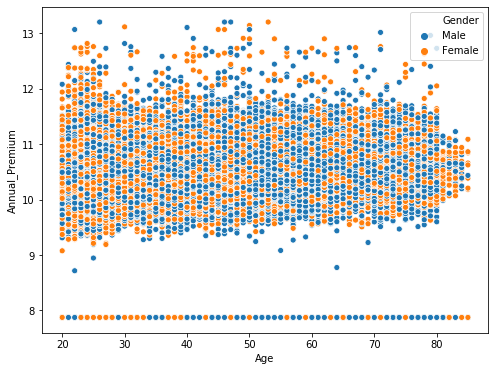

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Annual_Premium',data=df, hue='Gender')
plt.show()

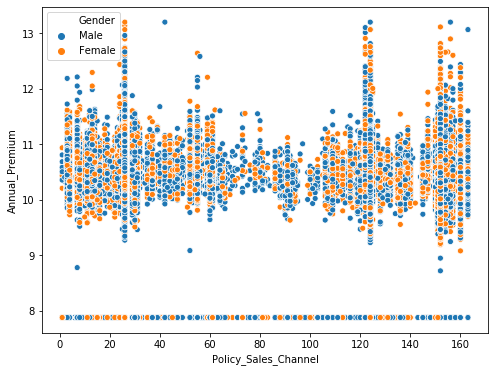

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(y='Annual_Premium', x='Policy_Sales_Channel',data=df, hue='Gender')
plt.show()

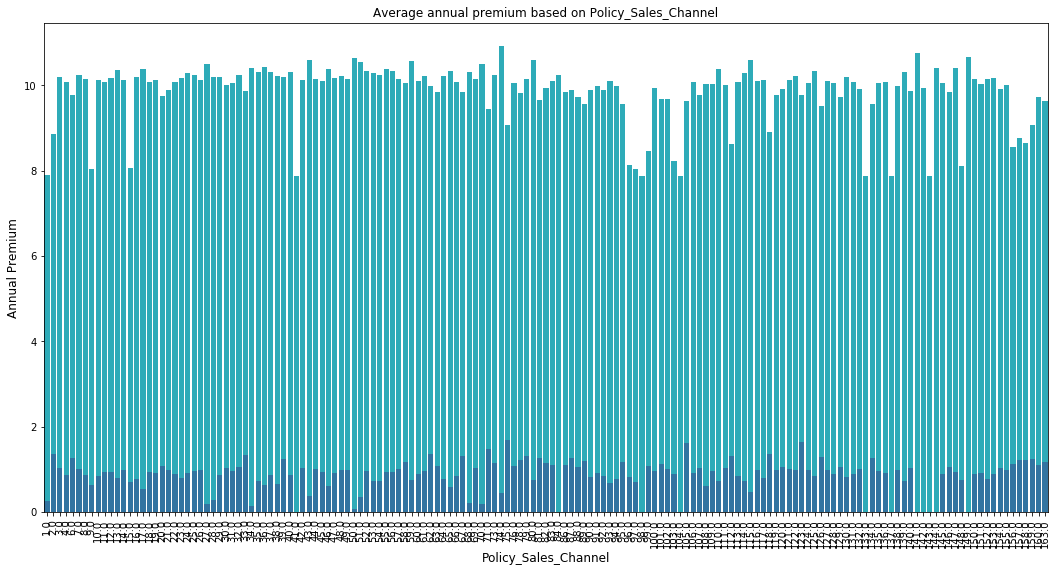

In [25]:
plt.figure(figsize=(18,9))
## Mean distribution
sns.barplot(y="Annual_Premium",x=df.groupby(['Policy_Sales_Channel']).mean().index,
            data=df.groupby(['Policy_Sales_Channel']).mean(), color=color[9])
## Standard deviation
sns.barplot(y="Annual_Premium",x=df.groupby(['Policy_Sales_Channel']).std().index,
            data=df.groupby(['Policy_Sales_Channel']).std(), color=color[0])
plt.ylabel('Annual Premium', fontsize=12)
plt.xlabel('Policy_Sales_Channel', fontsize=12)
plt.xticks(rotation=90)
plt.title("Average annual premium based on Policy_Sales_Channel", fontsize=12)
plt.show()

In [28]:
df['AP_PSC_mean'] = df.groupby('Policy_Sales_Channel')['Annual_Premium'].transform('mean')
df['AP_PSC_std'] = df.groupby('Policy_Sales_Channel')['Annual_Premium'].transform('std').fillna(0)

In [ ]:
#df['AP_PSC_norm'] = (df.AP_PSC_mean - df.Annual_Premium)/df.Annual_Premium

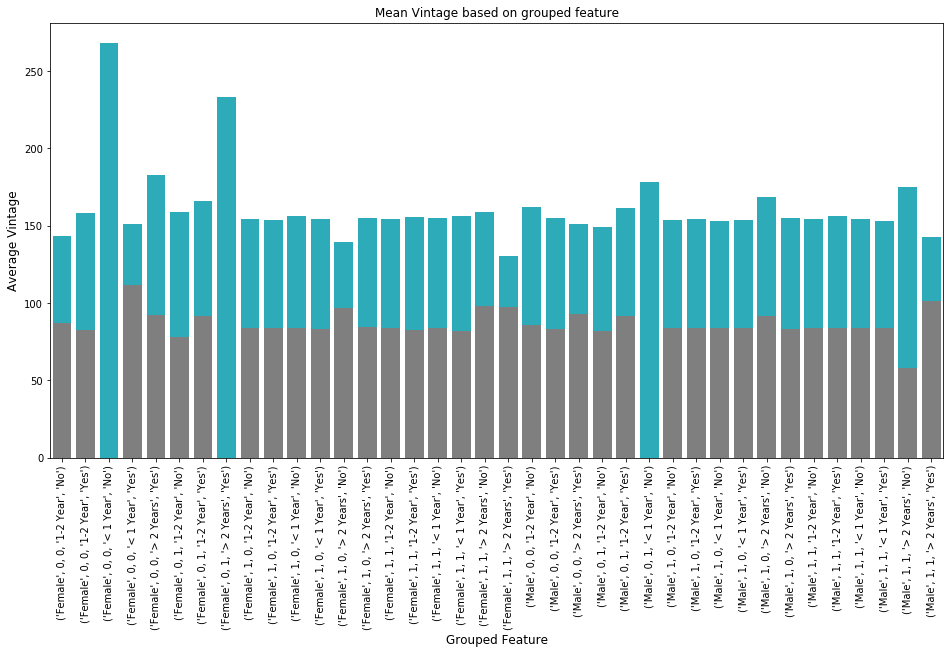

In [29]:
grp_feature = ['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage']
plt.figure(figsize=(16,8))
sns.barplot(y="Vintage",x=df.groupby(grp_feature).mean().index,
            data=df.groupby(grp_feature).mean(), color=color[9])
sns.barplot(y="Vintage",x=df.groupby(grp_feature).std().index,
            data=df.groupby(grp_feature).std(), color=color[7])
plt.ylabel('Average Vintage', fontsize=12)
plt.xlabel('Grouped Feature', fontsize=12)
plt.xticks(rotation=90)
plt.title("Mean Vintage based on grouped feature", fontsize=12)
plt.show()

In [30]:
df['MeanVintage_grp'] = df.groupby(grp_feature)['Vintage'].transform('mean')
df['StdVintage_grp'] = df.groupby(grp_feature)['Vintage'].transform('mean').fillna(0)
df['MeanVintage_grp_norm'] = (df.MeanVintage_grp - df.Vintage)/df.Vintage

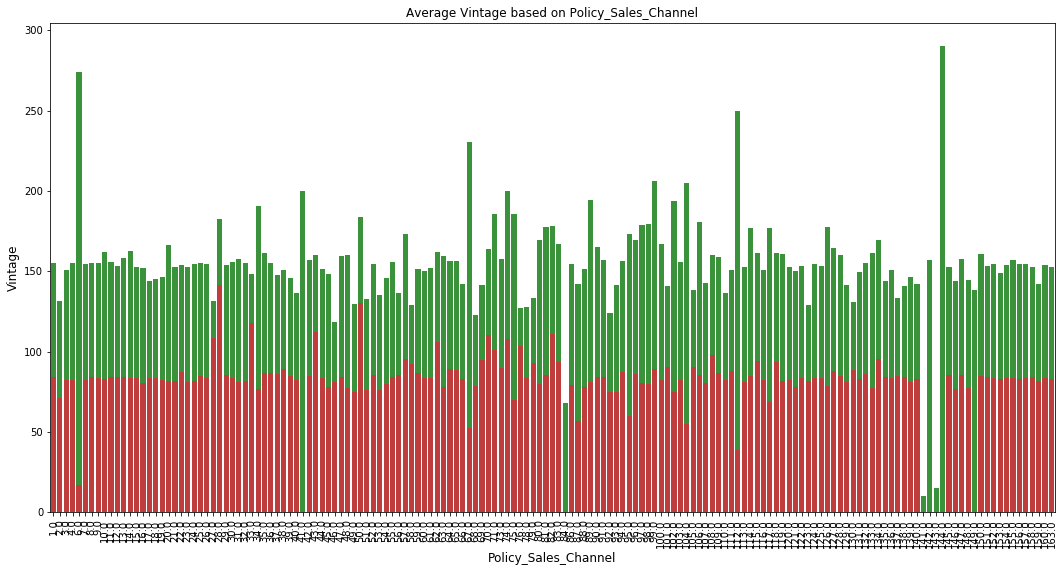

In [31]:
plt.figure(figsize=(18,9))
sns.barplot(y="Vintage",x=df.groupby(['Policy_Sales_Channel']).mean().index,
            data=df.groupby(['Policy_Sales_Channel']).mean(), color=color[2])
sns.barplot(y="Vintage",x=df.groupby(['Policy_Sales_Channel']).std().index,
            data=df.groupby(['Policy_Sales_Channel']).std(), color=color[3])
plt.ylabel('Vintage', fontsize=12)
plt.xlabel('Policy_Sales_Channel', fontsize=12)
plt.xticks(rotation=90)
plt.title("Average Vintage based on Policy_Sales_Channel", fontsize=12)
plt.show()

In [32]:
df['Vin_PSC_mean'] = df.groupby('Policy_Sales_Channel')['Vintage'].transform('mean')
#df['Vin_PSC_std'] = df.groupby('Policy_Sales_Channel')['Vintage'].transform('std').fillna(-999)
#df['Vin_PSC_norm'] = (df.Vin_PSC_mean - df.Vintage)/df.Vintage

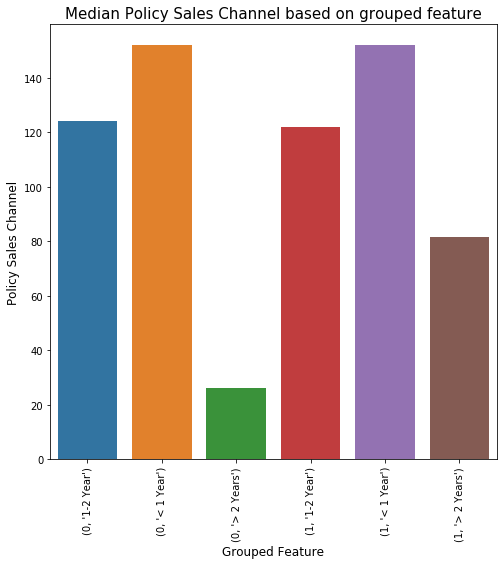

In [33]:
grp_feature = ['Previously_Insured','Vehicle_Age']
plt.figure(figsize=(8,8))
sns.barplot(y="Policy_Sales_Channel",x=df.groupby(grp_feature).median().index,
            data=df.groupby(grp_feature).median())
plt.ylabel('Policy Sales Channel', fontsize=12)
plt.xlabel('Grouped Feature', fontsize=12)
plt.xticks(rotation=90)
plt.title("Median Policy Sales Channel based on grouped feature", fontsize=15)
plt.show()

In [34]:
df['MedPSC_grp'] = df.groupby(grp_feature)['Policy_Sales_Channel'].transform('median')

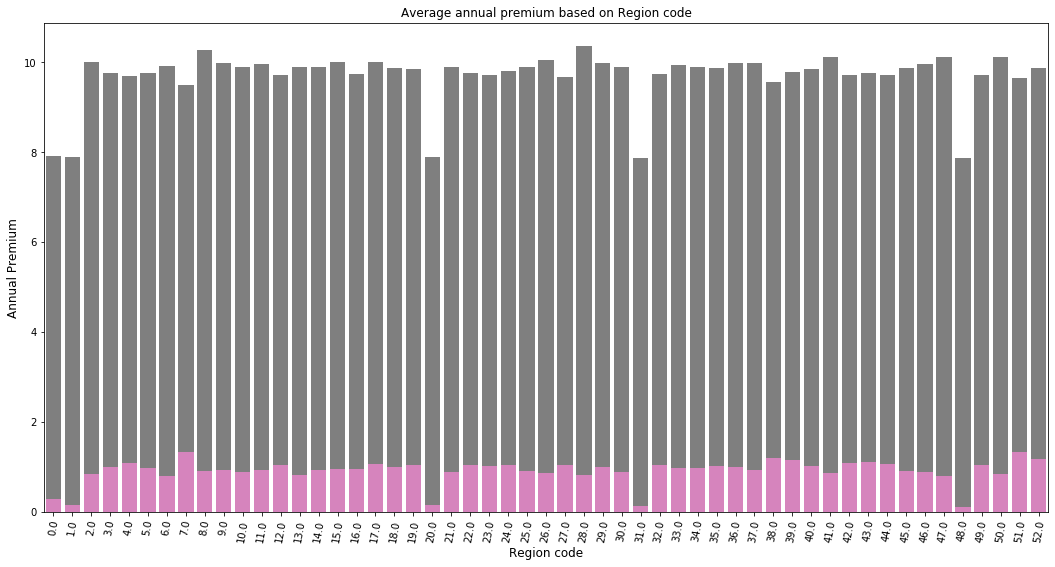

In [35]:
plt.figure(figsize=(18,9))
sns.barplot(y="Annual_Premium",x=df.groupby(['Region_Code']).mean().index,
            data=df.groupby(['Region_Code']).mean(), color=color[7])
sns.barplot(y="Annual_Premium",x=df.groupby(['Region_Code']).std().index,
            data=df.groupby(['Region_Code']).std(), color=color[6])
plt.ylabel('Annual Premium', fontsize=12)
plt.xlabel('Region code', fontsize=12)
plt.xticks(rotation=80)
plt.title("Average annual premium based on Region code", fontsize=12)
plt.show()

In [36]:
df['AP_Rgn_mean'] = df.groupby('Region_Code')['Annual_Premium'].transform('mean')
df['AP_Rgn_std'] = df.groupby('Region_Code')['Annual_Premium'].transform('std')

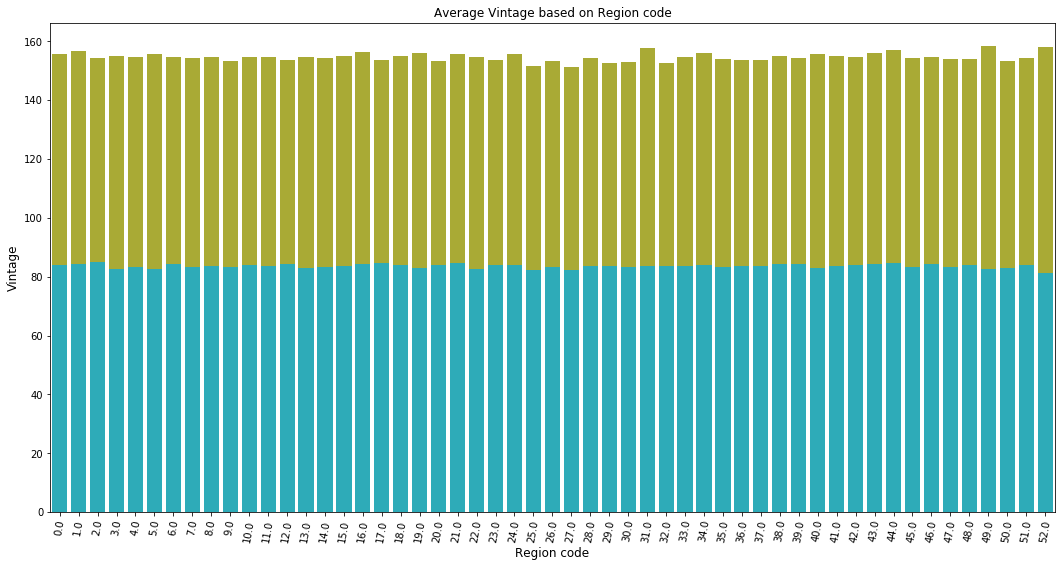

In [37]:
plt.figure(figsize=(18,9))
sns.barplot(y="Vintage",x=df.groupby(['Region_Code']).mean().index,
            data=df.groupby(['Region_Code']).mean(), color=color[8])
sns.barplot(y="Vintage",x=df.groupby(['Region_Code']).std().index,
            data=df.groupby(['Region_Code']).std(), color=color[9])
plt.ylabel('Vintage', fontsize=12)
plt.xlabel('Region code', fontsize=12)
plt.xticks(rotation=80)
plt.title("Average Vintage based on Region code", fontsize=12)
plt.show()

In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mms = MinMaxScaler()
col = 'Age'
df[col] = mms.fit_transform(df[col].values.reshape(-1,1))

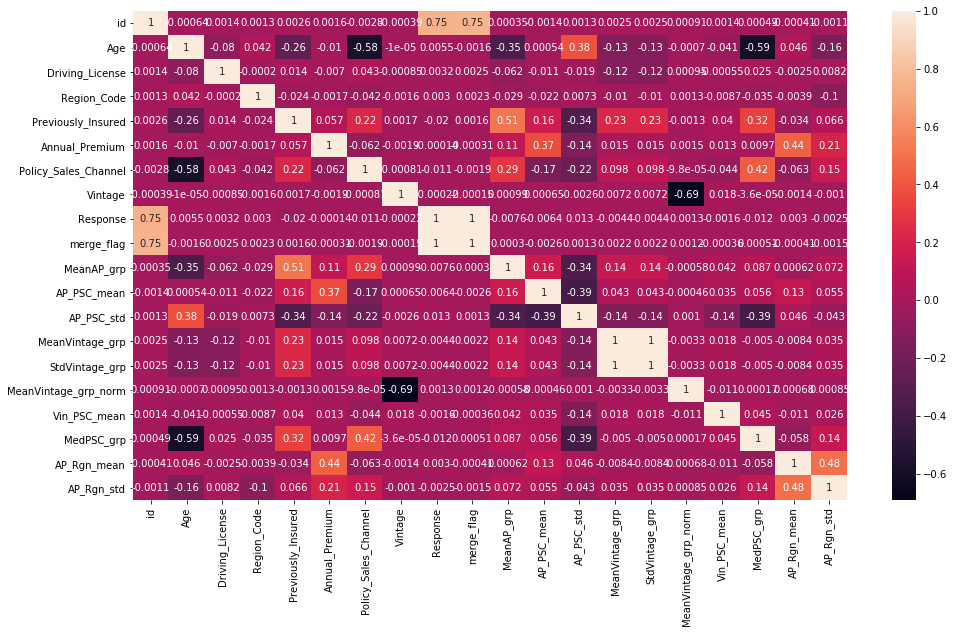

In [39]:
plt.figure(figsize = (16,9))
sns.heatmap(df.corr(),annot=True,cbar = True)
##df.corr().style.background_gradient(cmap='Oranges')
plt.show()

### Categorical value treatment -

In [40]:
df.Region_Code = df.Region_Code.astype('int')
df.Policy_Sales_Channel = df.Policy_Sales_Channel.astype('int')
df.dtypes

id                        int64
Gender                   object
Age                     float64
Driving_License           int64
Region_Code               int64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel      int64
Vintage                   int64
Response                  int64
merge_flag                int64
MeanAP_grp              float64
AP_PSC_mean             float64
AP_PSC_std              float64
MeanVintage_grp         float64
StdVintage_grp          float64
MeanVintage_grp_norm    float64
Vin_PSC_mean            float64
MedPSC_grp              float64
AP_Rgn_mean             float64
AP_Rgn_std              float64
dtype: object

In [41]:
categorical_feature=['Gender','Driving_License','Region_Code','Previously_Insured',
                     'Vehicle_Age','Vehicle_Damage','Policy_Sales_Channel']

In [42]:
transform_dict={'Gender': {'Female': 0, 'Male': 1},
 'Vehicle_Age': {'1-2 Year': 1, '< 1 Year': 0, '> 2 Years': 2},
 'Vehicle_Damage': {'No': 0, 'Yes': 1}}
transform_dict

{'Gender': {'Female': 0, 'Male': 1},
 'Vehicle_Age': {'1-2 Year': 1, '< 1 Year': 0, '> 2 Years': 2},
 'Vehicle_Damage': {'No': 0, 'Yes': 1}}

In [43]:
inverse_transform_dict = {'Gender': {0: 'Female', 1: 'Male'},
 'Vehicle_Age': {1: '1-2 Year', 0: '< 1 Year', 2: '> 2 Years'},
 'Vehicle_Damage': {0: 'No', 1: 'Yes'}}
inverse_transform_dict

{'Gender': {0: 'Female', 1: 'Male'},
 'Vehicle_Age': {1: '1-2 Year', 0: '< 1 Year', 2: '> 2 Years'},
 'Vehicle_Damage': {0: 'No', 1: 'Yes'}}

In [44]:
df.replace(transform_dict, inplace=True)
df.dtypes

id                        int64
Gender                    int64
Age                     float64
Driving_License           int64
Region_Code               int64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel      int64
Vintage                   int64
Response                  int64
merge_flag                int64
MeanAP_grp              float64
AP_PSC_mean             float64
AP_PSC_std              float64
MeanVintage_grp         float64
StdVintage_grp          float64
MeanVintage_grp_norm    float64
Vin_PSC_mean            float64
MedPSC_grp              float64
AP_Rgn_mean             float64
AP_Rgn_std              float64
dtype: object

In [45]:
train = df[df.merge_flag==0]
test = df[df.merge_flag==1]
train.drop(['merge_flag'], axis=1, inplace=True)
test.drop(['merge_flag','Response'], axis=1, inplace=True)
train.shape, test.shape

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((381109, 22), (127037, 21))

In [46]:
cols_to_drop = ['id']
train.drop(cols_to_drop, axis=1, inplace=True)
test.drop(cols_to_drop, axis=1, inplace=True)
train.shape,test.shape

((381109, 21), (127037, 20))

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(train)

## Distribution of target class

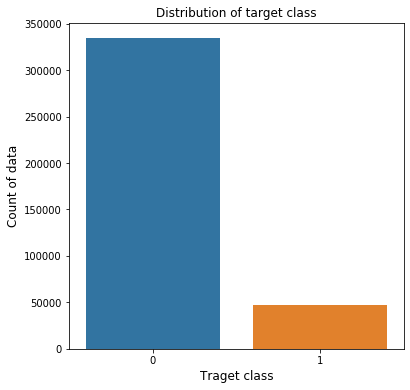

In [47]:
plt.figure(figsize=(6,6))
sns.countplot(train.Response)
plt.xlabel('Traget class', fontsize=12)
plt.ylabel('Count of data', fontsize=12)
plt.xticks(rotation=0)
plt.title("Distribution of target class", fontsize=12)
plt.show()

In [48]:
## percentage of data in each class
pd.DataFrame(train.Response.value_counts()*100/len(train))

,Response
0,87.743664
1,12.256336


In [49]:
feature_names=[i for i in train.columns if i!= 'Response']
X_trn = train[feature_names]
y_trn = train['Response']
X_tst = test[feature_names]

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_trn, y_trn,stratify=y_trn,
                                                      test_size=0.2,random_state=17)

X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_tst.shape

((304887, 20), (304887,), (76222, 20), (76222,), (127037, 20))

In [50]:
from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(y_trn), (class_weight.compute_class_weight('balanced',
                                                 np.unique(y_trn),
                                                 y_trn)).round(2)))
class_weights

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass classes=[0 1], y=0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


{0: 0.57, 1: 4.08}

In [51]:
from sklearn import metrics

def AUC(actual,pred):
    return metrics.roc_auc_score(actual, pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,random_state=7,max_features = "sqrt",
                            min_samples_leaf=15,min_samples_split=5, oob_score = True,n_jobs = -1)
rf.fit(X_train, y_train)
print('Accuracy of Random Forest classifier on training set: {:.4f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.4f}'
     .format(rf.score(X_valid, y_valid)))

In [ ]:
print("AUC on training set:",AUC(y_train, rf.predict_proba(X_train)[:,1]))
print("AUC on validation set:",AUC(y_valid, rf.predict_proba(X_valid)[:,1]))

In [ ]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
imp_feature=feature_importances[feature_importances['importance']>=0.01].T.columns
print(len(imp_feature))
feature_importances

In [ ]:
rf.predict_proba(X_tst)[:,1]

In [ ]:
import xgboost as xgb

param = {'silent':1, 'objective':'binary:logistic', 'booster':'gbtree','eta':0.1,'min_child_weight':1,
         'max_depth':20, 'eval_metric':'auc','gamma':.1,'max_delta_step':1,'subsample':.5,
         'alpha': 0.01,'colsample_bytree':.5, 'lambda': .1, 'seed':41}
xgtrain = xgb.DMatrix(X_train[imp_feature], label = y_train)
xgcv = xgb.DMatrix(X_valid[imp_feature], label = y_valid)
xgtest = xgb.DMatrix(X_tst[imp_feature])

watchlist = [(xgcv, 'eval'), (xgtrain, 'train')]
num_round = 300
bst = xgb.train(param, xgtrain, num_round, watchlist, early_stopping_rounds = 10)

In [ ]:
print("AUC on training set:",AUC(y_train, bst.predict(xgtrain)))
print("AUC on validation set:",AUC(y_valid, bst.predict(xgcv)))

In [ ]:
pred_xgb=bst.predict(xgtest)

sub['Response'] = pred_xgb
sub.to_csv('submission.csv', index=False)

In [ ]:
class_weights

In [97]:
from catboost import CatBoostClassifier

#clf = CatBoostClassifier(
#    random_seed=41,
#    colsample_bylevel=.1,
#    bagging_temperature=.2,
#    class_names=[0,1,2,3,4,5,6,7,8,9,10],
#    classes_count=11,
#    #class_weights= class_weights,
#    use_best_model=True,
#    iterations=400, 
#    learning_rate=0.18,
#    eval_metric='MultiClass',
#    custom_loss=['Accuracy'],
#    loss_function='MultiClass')

clf = CatBoostClassifier(
    random_seed=41,
    iterations=400, 
    learning_rate=0.098,
    #l2_leaf_reg = 1,
    #colsample_bylevel=.2,
    #bagging_temperature=.7,
    border_count = 512,
    #min_data_in_leaf=10,
    #max_bin=255,
    #class_weights= {0: .24, 1:1.75 },
    class_weights= class_weights,
    #depth=15,
    #subsample= 0.1,
    eval_metric='AUC',
    custom_loss=['AUC'],
    #loss_function='CrossEntropy'
    loss_function='Logloss'
)

clf.fit(X_train, y_train, 
        cat_features=categorical_feature, 
        eval_set=(X_valid, y_valid),
        plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8357384	best: 0.8357384 (0)	total: 470ms	remaining: 3m 7s
1:	test: 0.8398038	best: 0.8398038 (1)	total: 860ms	remaining: 2m 51s
2:	test: 0.8422376	best: 0.8422376 (2)	total: 1.08s	remaining: 2m 22s
3:	test: 0.8425210	best: 0.8425210 (3)	total: 1.61s	remaining: 2m 39s
4:	test: 0.8444590	best: 0.8444590 (4)	total: 2.01s	remaining: 2m 38s
5:	test: 0.8471670	best: 0.8471670 (5)	total: 2.29s	remaining: 2m 30s
6:	test: 0.8473784	best: 0.8473784 (6)	total: 2.54s	remaining: 2m 22s
7:	test: 0.8477880	best: 0.8477880 (7)	total: 2.79s	remaining: 2m 16s
8:	test: 0.8477575	best: 0.8477880 (7)	total: 3.03s	remaining: 2m 11s
9:	test: 0.8483647	best: 0.8483647 (9)	total: 3.29s	remaining: 2m 8s
10:	test: 0.8504234	best: 0.8504234 (10)	total: 3.54s	remaining: 2m 5s
11:	test: 0.8514891	best: 0.8514891 (11)	total: 3.78s	remaining: 2m 2s
12:	test: 0.8528017	best: 0.8528017 (12)	total: 4s	remaining: 1m 59s
13:	test: 0.8539354	best: 0.8539354 (13)	total: 4.28s	remaining: 1m 57s
14:	test: 0.8540492

114:	test: 0.8607666	best: 0.8607691 (113)	total: 29.6s	remaining: 1m 13s
115:	test: 0.8607802	best: 0.8607802 (115)	total: 29.8s	remaining: 1m 12s
116:	test: 0.8607724	best: 0.8607802 (115)	total: 30s	remaining: 1m 12s
117:	test: 0.8607919	best: 0.8607919 (117)	total: 30.2s	remaining: 1m 12s
118:	test: 0.8608151	best: 0.8608151 (118)	total: 30.6s	remaining: 1m 12s
119:	test: 0.8608147	best: 0.8608151 (118)	total: 30.8s	remaining: 1m 11s
120:	test: 0.8608249	best: 0.8608249 (120)	total: 31s	remaining: 1m 11s
121:	test: 0.8608515	best: 0.8608515 (121)	total: 31.3s	remaining: 1m 11s
122:	test: 0.8608636	best: 0.8608636 (122)	total: 31.6s	remaining: 1m 11s
123:	test: 0.8608641	best: 0.8608641 (123)	total: 31.8s	remaining: 1m 10s
124:	test: 0.8608641	best: 0.8608641 (123)	total: 31.9s	remaining: 1m 10s
125:	test: 0.8608780	best: 0.8608780 (125)	total: 32.2s	remaining: 1m 9s
126:	test: 0.8608750	best: 0.8608780 (125)	total: 32.5s	remaining: 1m 9s
127:	test: 0.8608844	best: 0.8608844 (127)	t

227:	test: 0.8610347	best: 0.8610650 (144)	total: 57.8s	remaining: 43.6s
228:	test: 0.8610347	best: 0.8610650 (144)	total: 58s	remaining: 43.3s
229:	test: 0.8610189	best: 0.8610650 (144)	total: 58.2s	remaining: 43s
230:	test: 0.8610120	best: 0.8610650 (144)	total: 58.5s	remaining: 42.8s
231:	test: 0.8610193	best: 0.8610650 (144)	total: 58.7s	remaining: 42.5s
232:	test: 0.8610281	best: 0.8610650 (144)	total: 59s	remaining: 42.3s
233:	test: 0.8610347	best: 0.8610650 (144)	total: 59.2s	remaining: 42s
234:	test: 0.8610246	best: 0.8610650 (144)	total: 59.4s	remaining: 41.7s
235:	test: 0.8610244	best: 0.8610650 (144)	total: 59.6s	remaining: 41.4s
236:	test: 0.8610188	best: 0.8610650 (144)	total: 59.8s	remaining: 41.2s
237:	test: 0.8610155	best: 0.8610650 (144)	total: 1m	remaining: 40.9s
238:	test: 0.8610179	best: 0.8610650 (144)	total: 1m	remaining: 40.6s
239:	test: 0.8610175	best: 0.8610650 (144)	total: 1m	remaining: 40.4s
240:	test: 0.8610282	best: 0.8610650 (144)	total: 1m	remaining: 40.1

339:	test: 0.8608527	best: 0.8610650 (144)	total: 1m 25s	remaining: 15.1s
340:	test: 0.8608542	best: 0.8610650 (144)	total: 1m 25s	remaining: 14.9s
341:	test: 0.8608510	best: 0.8610650 (144)	total: 1m 26s	remaining: 14.6s
342:	test: 0.8608454	best: 0.8610650 (144)	total: 1m 26s	remaining: 14.4s
343:	test: 0.8608474	best: 0.8610650 (144)	total: 1m 26s	remaining: 14.1s
344:	test: 0.8608461	best: 0.8610650 (144)	total: 1m 26s	remaining: 13.9s
345:	test: 0.8608507	best: 0.8610650 (144)	total: 1m 27s	remaining: 13.6s
346:	test: 0.8608534	best: 0.8610650 (144)	total: 1m 27s	remaining: 13.4s
347:	test: 0.8608470	best: 0.8610650 (144)	total: 1m 27s	remaining: 13.1s
348:	test: 0.8608564	best: 0.8610650 (144)	total: 1m 28s	remaining: 12.9s
349:	test: 0.8608595	best: 0.8610650 (144)	total: 1m 28s	remaining: 12.6s
350:	test: 0.8608474	best: 0.8610650 (144)	total: 1m 28s	remaining: 12.4s
351:	test: 0.8608523	best: 0.8610650 (144)	total: 1m 29s	remaining: 12.1s
352:	test: 0.8608483	best: 0.8610650 (

In [98]:
print("AUC on training set:",AUC(y_train, clf.predict_proba(X_train)[:,1]))
print("AUC on validation set:",AUC(y_valid, clf.predict_proba(X_valid)[:,1]))

AUC on training set: 0.8615601174285867
AUC on validation set: 0.8610650174419378


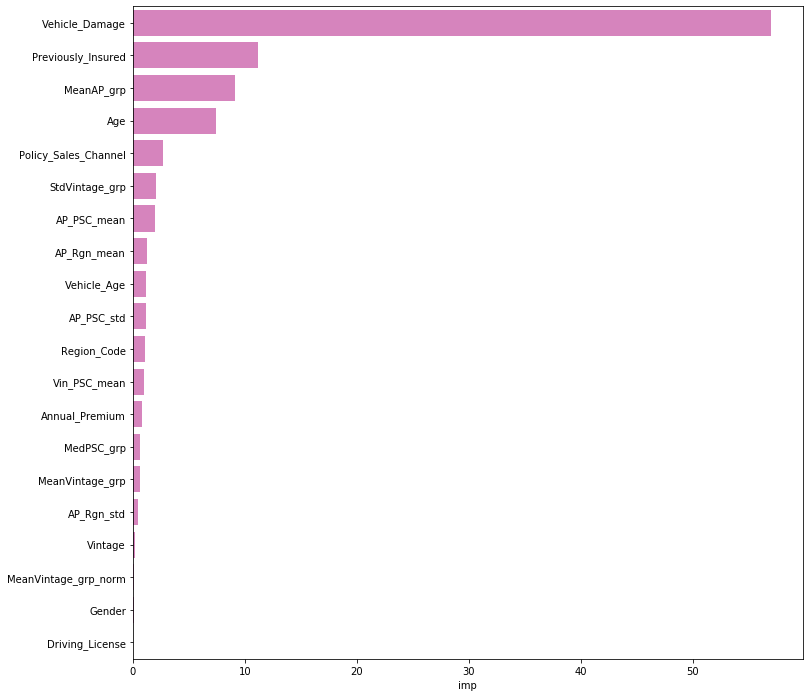

In [99]:
feature_imp=pd.DataFrame(clf.feature_importances_,X_train.columns, columns=['imp'])

plt.figure(figsize=(12,12))
sns.barplot(x='imp',
            y=feature_imp.sort_values('imp', ascending=False).index,
            data= feature_imp.sort_values('imp', ascending=False), color=color[6])
plt.show()

In [100]:
pred_cb =clf.predict_proba(X_tst)[:,1]
sub['Response'] = pred_cb
sub.to_csv('submission.csv', index=False)

In [ ]:
import lightgbm as lgb
#LightGBM classifier

model = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary',
                       early_stopping = 50,num_iteration=10000,class_weight='balanced',#num_leaves=80,
                       is_enable_sparse='true',tree_learner='data',min_data_in_leaf=50,max_depth=30,
                       learning_rate=0.01, n_estimators=1000, max_bin=255, subsample_for_bin=5000, 
                       min_split_gain=.8, min_child_weight=.2, min_child_samples=10, subsample=0.5, 
                       subsample_freq=1, colsample_bytree=.3, reg_alpha=0.01, 
                       reg_lambda=1, seed=41, nthread=-1, silent=True)

In [ ]:
model.fit(
    X_train, 
    y_train,
    categorical_feature=categorical_feature,
    eval_metric="AUC", 
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    verbose=True,
    early_stopping_rounds = 50)

In [ ]:
print("AUC on training set:",AUC(y_train, model.predict_proba(X_train)[:,1]))
print("AUC on validation set:",AUC(y_valid, model.predict_proba(X_valid)[:,1]))

In [ ]:
feature_imp=pd.DataFrame(model.feature_importances_,X_train.columns, columns=['imp'])
plt.figure(figsize=(12,12))
sns.barplot(x="imp",
            y=feature_imp.sort_values('imp', ascending=False).index,
            data= feature_imp.sort_values('imp', ascending=False),
            color=color[9])
plt.show()

In [ ]:
pred_lgb=model.predict_proba(X_tst)[:,1]
sub['Response'] = pred_lgb
sub.to_csv('submission.csv', index=False)

In [ ]:
import lightgbm as lgb
lgbm_params =  {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_iteration': 10000,
    'is_enable_sparse': True,
    'tree_learner':'voting',
    'min_data_in_leaf': 40,
    'max_depth': 25,
    'max_bin': 255,
    'subsample_for_bin':5000,
    'metric': 'auc',
    'learning_rate': 0.01,
    'feature_fraction': 0.3,
    'bagging_fraction': 0.2,
    'min_child_samples': 20,
    'reg_lambda': 1,
    'subsample':0.5,
    'subsample_freq':1,
    'min_split_gain': .6,
    'colsample_bytree':0.5,
    'min_child_weight': 1,
    'seed':41,'nthread':-1,
    'silent':True}

# LGBM Dataset
lgtrain = lgb.Dataset(X_train,label=y_train)

In [ ]:
N_FOLDS = 5
MAX_BOOST_ROUNDS = 300

cv_results = lgb.cv(lgbm_params, lgtrain, num_boost_round=MAX_BOOST_ROUNDS, nfold=N_FOLDS, stratified=True,
                    verbose_eval=10, early_stopping_rounds=60,eval_train_metric=True,show_stdv=False)

In [ ]:
model_lgb = lgb.train(lgbm_params, lgtrain, num_boost_round=300)

In [ ]:
print("AUC on training set:",AUC(y_train, model_lgb.predict(X_train)))
print("AUC on validation set:",AUC(y_valid, model_lgb.predict(X_valid)))

In [ ]:
feature_imp=pd.DataFrame(model_lgb.feature_importance(),X_train.columns, columns=['imp'])
plt.figure(figsize=(12,12))
sns.barplot(x="imp",
            y=feature_imp.sort_values('imp', ascending=False).index,
            data= feature_imp.sort_values('imp', ascending=False),
            color=color[9])
plt.show()